<a href="https://colab.research.google.com/github/ThanhThuyHuynh/ML/blob/main/Lab_7_20130429_HuynhThiThanhThuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [ ]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Thực hành ML/ML Lab7'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thực hành ML/ML Lab7


In [ ]:
# code
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay, precision_score, f1_score, accuracy_score
from sklearn import datasets
import sklearn 
import matplotlib.pyplot as plt
from sklearn import svm
from prettytable import PrettyTable
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, KFold

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
# code
data = datasets.load_iris()
x = data['data']
y = data['target']

In [ ]:
#code
clf = svm.SVC(kernel='sigmoid', random_state = 0)
scores = cross_validate(clf, x, y, scoring='accuracy', cv=10)

print(sorted(scores.keys()))
print(np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
0.06666666666666668


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = svm.SVC(kernel='rbf', random_state= 0)

scores = cross_val_score(model, x, y, scoring='precision_macro', cv= cv)

print(scores.mean())

0.9507936507936507


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
# code
data = datasets.load_iris()
x = data['data']
y = data['target']


In [ ]:
#code
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x, y)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=data.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.459785
petal width (cm)     0.414909
sepal length (cm)    0.096030
sepal width (cm)     0.029276
dtype: float64

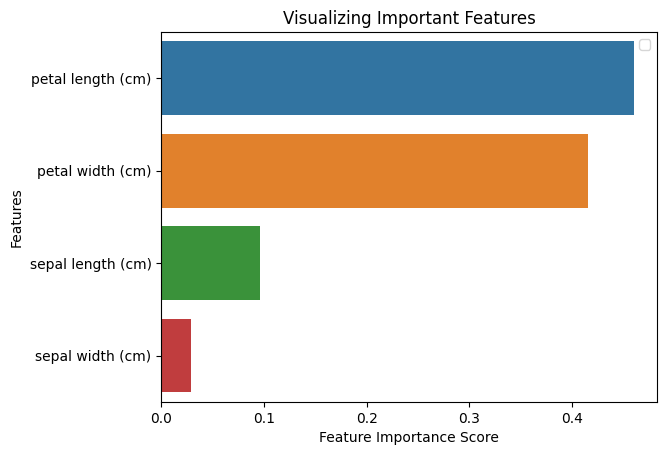

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
model = ExtraTreesClassifier(n_estimators=3)
model.fit(x, y)

In [ ]:

scores = cross_validate(clf, x, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.96


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [ ]:
# code
mnist = datasets.load_digits()
x = mnist['data']
y = mnist['target']
y.astype('int')

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(x)
x_clusters = kmeans.predict(x)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 5, 5, ..., 5, 1, 1], dtype=int32)

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# code

models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    KMeans(n_clusters = 10, random_state = 42)
]


metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

table = PrettyTable(['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
for model in models:
    row = [model.__class__.__name__]
    for metric in metrics:
        scores = cross_val_score(model, x_clusters.reshape(-1, 1), y, cv=kf, scoring=metric)
        row.append('{:.4f}'.format(scores.mean()))
    table.add_row(row)
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

+------------------------+----------+-----------+--------+--------+
|         Model          | Accuracy | Precision | Recall |   F1   |
+------------------------+----------+-----------+--------+--------+
| RandomForestClassifier |  0.7824  |   0.7604  | 0.7849 | 0.7635 |
|  KNeighborsClassifier  |  0.7668  |   0.7609  | 0.7689 | 0.7528 |
|       GaussianNB       |  0.6566  |   0.5555  | 0.6601 | 0.5875 |
|         KMeans         |  0.0585  |   0.0684  | 0.0631 | 0.0641 |
+------------------------+----------+-----------+--------+--------+


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
# Supervised learning is better

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [ ]:
sse = []
for k in range(1, 11):
  cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
  cluster.fit(mnist)
  # get clustering labels
  sse.append(clusters.labels_)

plt.plot(sse)

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
#code
url = "shopping-data.csv"
dataframe = pd.read_csv(url)
df = dataframe.values
dataframe
# X = df[:,:-1]
# y = df[:,-1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [ ]:
#code

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.